<a href="https://colab.research.google.com/github/KelvinLam05/employee_churn_prediction/blob/main/employee_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal of the project**

In this notebook, we will use ktrain to create an employee churn model that will predict which of our staff is going to quit before they hand in their resignation letter.

**Load and preprocess data**

In [ ]:
# Importing libraries
import pandas as pd

In [ ]:
# Load dataset
df = pd.read_csv('/content/hr_dataset.csv')

In [ ]:
# Rename Pandas columns to lower case
df.columns = df.columns.str.lower()

In [ ]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [ ]:
# Examine the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
X = df.drop(['left'], axis = 1)

In [ ]:
y = df['left']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Stratified sampling based on the distribution of the target vector, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
train_df = X_train.join(y_train)

In [ ]:
test_df = X_test.join(y_test)

In [ ]:
import ktrain
from ktrain import tabular

In [ ]:
trn, val, preproc = tabular.tabular_from_df(train_df, label_columns = ['left'], random_state = 42)

**Create model and wrap in learner**

In [ ]:
import tensorflow as tf

In [ ]:
# Create model
model = tabular.tabular_classifier('mlp', trn, metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

Is Multi-Label? False
done.


In [ ]:
# Wrap model and data in ktrain.Learner object
learner = ktrain.get_learner(model, train_data = trn, val_data = val, batch_size = 32)

**Estimate a good learning rate**

To train the model, we will first find the optimal learning rate that suits well to our problem. ktrain provides a very good method named lr_find which trains the model at different learning rates and plots loss of the model as the learning rate is increased.

In [ ]:
# Briefly simulate training to find good learning rate
learner.lr_find(max_epochs = 3, suggest = True) 

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
338/338 [==============================] - 6s 16ms/step - loss: 0.6531 - precision_3: 0.7011 - recall_3: 0.7011
Epoch 2/3
338/338 [==============================] - 5s 14ms/step - loss: 0.2657 - precision_3: 0.9034 - recall_3: 0.9034
Epoch 3/3
338/338 [==============================] - 2s 5ms/step - loss: 1.9960 - precision_3: 0.7711 - recall_3: 0.7711


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


The learning rate plot can be observed by calling the following method:

Three possible suggestions for LR from plot:
	Longest valley (red): 8.77E-05
	Min numerical gradient (purple): 2.69E-05
	Min loss divided by 10 (omitted from plot): 2.12E-03


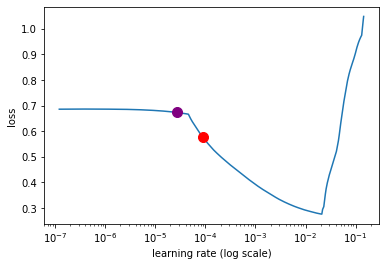

In [ ]:
# Visually identify best learning rate
learner.lr_plot(suggest = True)

**Train**

We will now train the model using the autofit method. The method trains the classifier and automatically selects the best performing one preventing underfitting and overfitting of the model.

In [ ]:
# Training using the autofit policy
learner.autofit(8.77E-05, early_stopping = 5)

reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 8.77e-05...
Epoch 1/1024
339/339 [==============================] - 10s 24ms/step - loss: 0.4406 - precision_3: 0.8341 - recall_3: 0.8341 - val_loss: 0.3119 - val_precision_3: 0.8959 - val_recall_3: 0.8959
Epoch 2/1024
339/339 [==============================] - 6s 18ms/step - loss: 0.2744 - precision_3: 0.9193 - recall_3: 0.9193 - val_loss: 0.2112 - val_precision_3: 0.9462 - val_recall_3: 0.9462
Epoch 3/1024
339/339 [==============================] - 6s 18ms/step - loss: 0.2059 - precision_3: 0.9458 - recall_3: 0.9458 - val_loss: 0.1626 - val_precision_3: 0.9599 - val_recall_3: 0.9599
Epoch 4/1024
339/339 [==============================] - 6s 18ms/step - loss: 0.1735 - precision_3: 0.9535 - recall_3: 0.9535 - val_loss: 0.1434 - val_precision_3: 0.9590 - val_recall_3: 0.9590
Epoch 5/1024
339/339 [==============================] - 6s 18ms/step - loss: 0.1545 - preci

**Evaluate model**

In [ ]:
learner.evaluate(val, class_names = preproc.get_classes())

              precision    recall  f1-score   support

    not_left       0.98      0.98      0.98       886
        left       0.95      0.95      0.95       286

    accuracy                           0.98      1172
   macro avg       0.97      0.97      0.97      1172
weighted avg       0.98      0.98      0.98      1172



array([[872,  14],
       [ 15, 271]])

**Evaluate model on unseen test data**

The learner.evaluate method is just an alias to learner.validate. By default, it was validate/evaluate learner.val_data, but both can accept a test set as an argument in the form of a TabularDataset.

We use learner.evaluate here to compute test set metrics.

In [ ]:
learner.evaluate(preproc.preprocess_test(test_df), class_names = preproc.get_classes())

processing test: 3000 rows x 10 columns
['not_left', 'left']
       not_left  left
6910        1.0   0.0
2860        1.0   0.0
6286        1.0   0.0
12838       1.0   0.0
13692       1.0   0.0
              precision    recall  f1-score   support

    not_left       0.97      0.99      0.98      2286
        left       0.95      0.92      0.94       714

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



array([[2253,   33],
       [  58,  656]])